## Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.0


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [3]:
# Carrega o dataset
df_dsa = pd.read_csv('data/dataset.csv')

In [4]:
# Shape
df_dsa.shape

(9700, 11)

In [5]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [7]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [13]:
df_aux = df_dsa[df_dsa['Categoria'] == 'Office Supplies']
sum_aux = df_aux.groupby('Cidade')['Valor_Venda'].sum()
sum_aux.idxmax()

'New York City'

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [14]:
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], format='%d/%m/%Y')

In [15]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID_Pedido     9700 non-null   object        
 1   Data_Pedido   9700 non-null   datetime64[ns]
 2   ID_Cliente    9700 non-null   object        
 3   Segmento      9700 non-null   object        
 4   Pais          9700 non-null   object        
 5   Cidade        9700 non-null   object        
 6   Estado        9700 non-null   object        
 7   ID_Produto    9700 non-null   object        
 8   Categoria     9700 non-null   object        
 9   SubCategoria  9700 non-null   object        
 10  Valor_Venda   9700 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 833.7+ KB


In [16]:
agg_byDate = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()
agg_byDate.head()

Data_Pedido
2015-01-03      16.448
2015-01-04     288.060
2015-01-05      19.536
2015-01-06    4407.100
2015-01-07      87.158
Name: Valor_Venda, dtype: float64

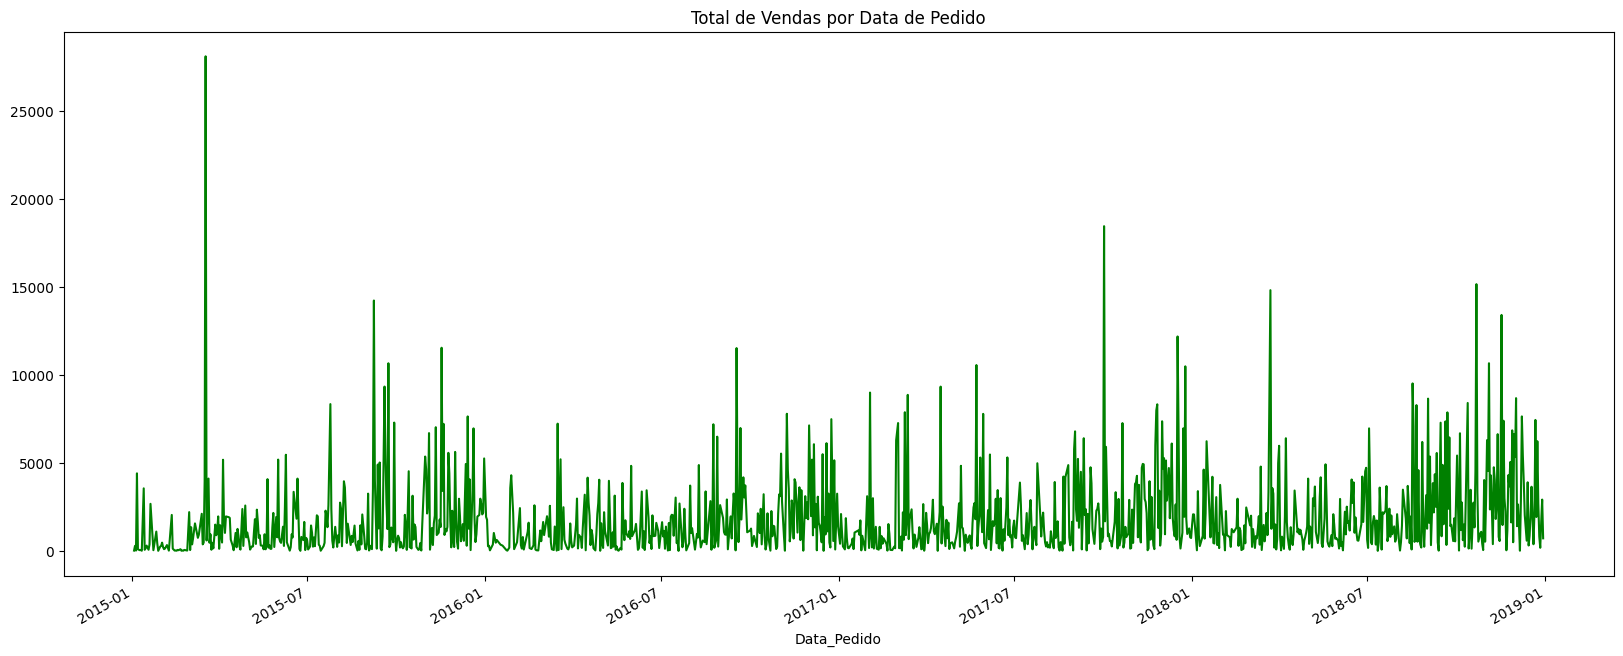

In [17]:
plt.figure(figsize=(20, 8))
agg_byDate.plot(x='Data_Pedido', y='Valor_Venda', color='green')
plt.title('Total de Vendas por Data de Pedido')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [18]:
agg_byState = df_dsa.groupby('Estado')['Valor_Venda'].sum()
agg_byState.head()

Estado
Alabama        19510.6400
Arizona        35272.6570
Arkansas       11673.8300
California    442927.0975
Colorado       31841.5980
Name: Valor_Venda, dtype: float64

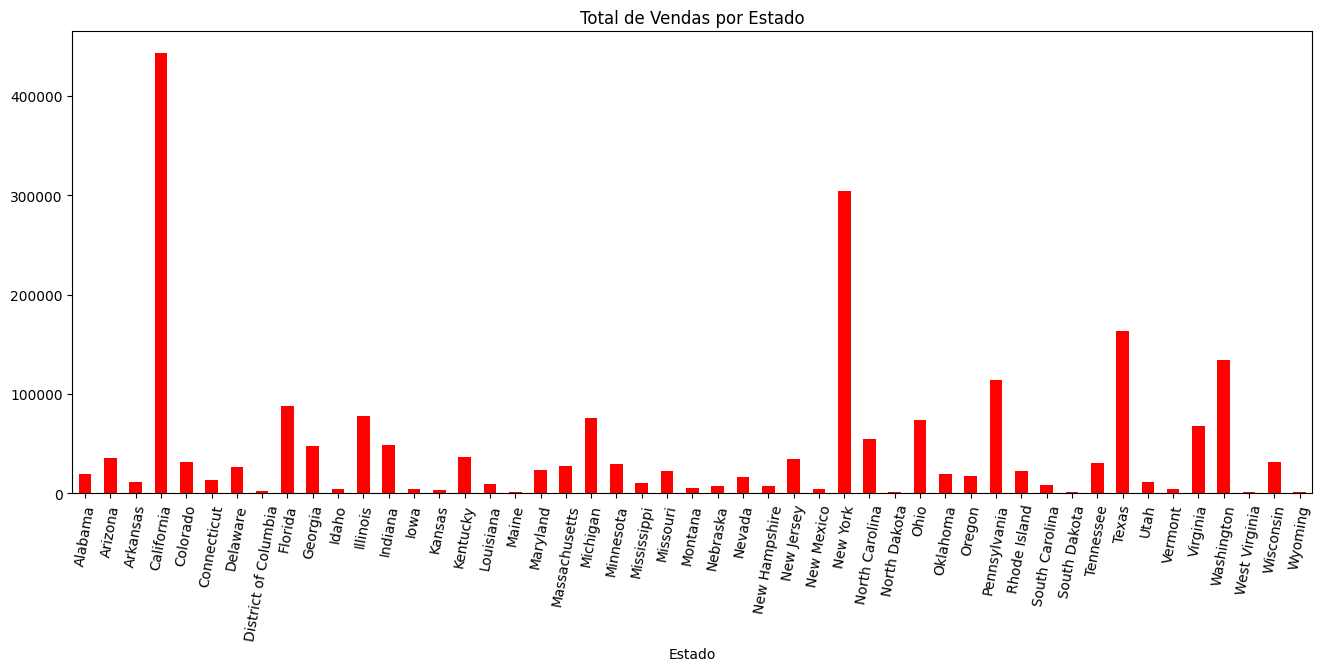

In [19]:
plt.figure(figsize=(16, 6))
agg_byState.plot.bar(x='Estado', y='Valor_Venda', color='red')
plt.title('Total de Vendas por Estado')
plt.xticks(rotation=80)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [20]:
top10_cities = df_dsa.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False).to_frame().head(10)
top10_cities

,Valor_Venda
Cidade,
New York City,251749.2190
Los Angeles,171654.6330
Seattle,114725.4780
San Francisco,107489.9520
Philadelphia,107197.8030
Houston,61590.1868
San Diego,47458.3790
Chicago,46974.3430
Jacksonville,44713.1830


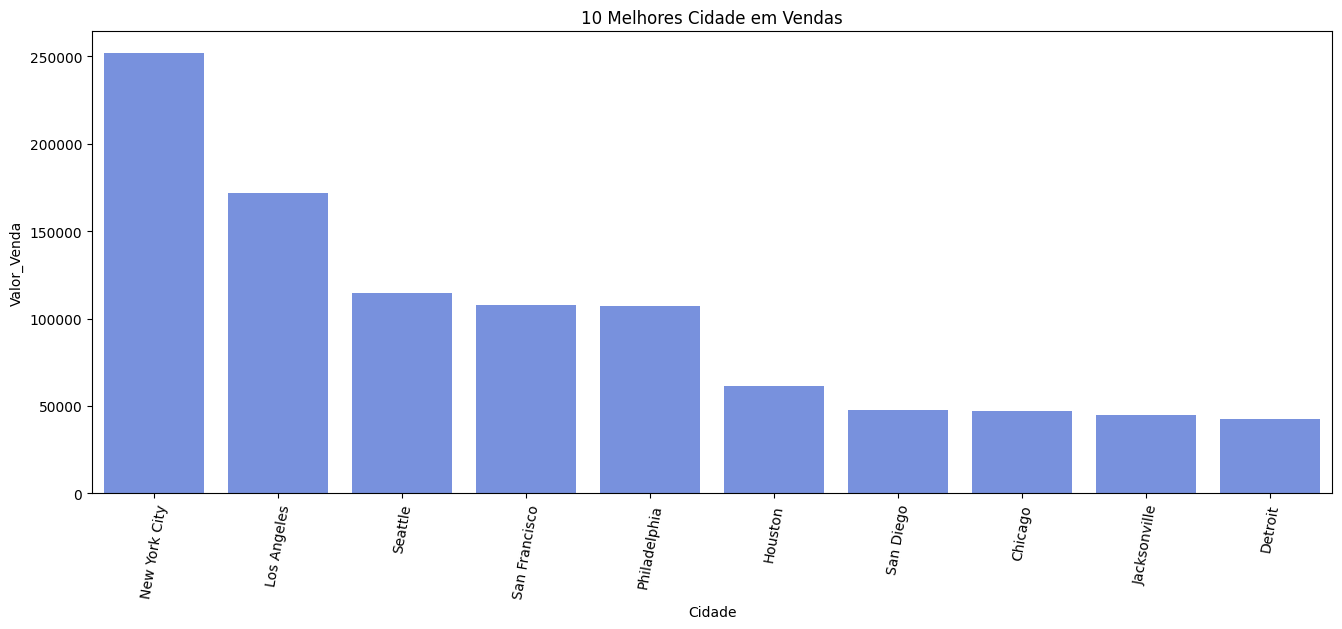

In [21]:
plt.figure(figsize=(16, 6))
sns.set_palette('coolwarm')
sns.barplot(data=top10_cities, x='Cidade', y='Valor_Venda').set(title='10 Melhores Cidade em Vendas')
plt.xticks(rotation=80)
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [22]:
agg_segmento = df_dsa.groupby('Segmento')['Valor_Venda'].sum().sort_values(ascending=False).reset_index()
agg_segmento

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [23]:
# função para converter os dados em valor absoluto
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v=val)
    return my_format

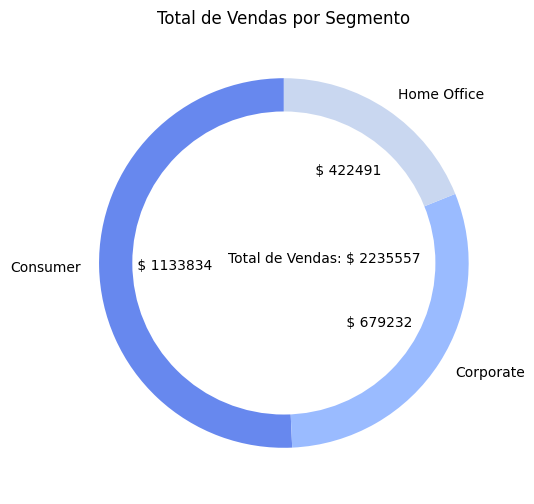

In [24]:
# Plot

# Tamnaho da figura
plt.figure(figsize=(16, 6))

# Gráfico de Pizza
plt.pie(agg_segmento['Valor_Venda'],
        labels=agg_segmento['Segmento'],
        autopct=autopct_format(agg_segmento['Valor_Venda']),
        startangle=90)

# Limpa o Círculo Central
centre_circle = plt.Circle((0,0), 0.82, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(agg_segmento['Valor_Venda']))), xy = (-0.30, 0))
plt.title('Total de Vendas por Segmento')
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [25]:
df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.year
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [26]:
# Total de Vendas por Segmento e por Ano
df_dsa.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum().to_frame()

Valor_Venda
Ano  Segmento                
2015 Consumer     256719.9166
     Corporate    125819.5957
     Home Office   88229.0878
2016 Consumer     265295.2593
     Corporate    114643.1229
     Home Office   74134.1332
2017 Consumer     288459.5572
     Corporate    203266.7398
     Home Office  103639.6270
2018 Consumer     323359.6019
     Corporate    235502.7284
     Home Office  156488.5849

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [27]:
df_dsa['Desconto'] = df_dsa['Valor_Venda'].apply(lambda x: 0.15 if x > 1000 else 0.10)
df_dsa['Desconto'].value_counts().values[1]

457

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [28]:
df_dsa['Valor_Venda'].mean()

230.4698922371134

In [29]:
# Calculando o valor de Venda - Desconto
df_dsa['Valor_Venda_Desconto'] = df_dsa['Valor_Venda'] - (df_dsa['Valor_Venda'] * df_dsa['Desconto'])
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [30]:
# Vendas antes do Desconto de 15%
vendas_antes_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda']

# Vendas depois do Desconto de 15%
vendas_depois_desconto = df_dsa.loc[df_dsa['Desconto'] == 0.15, 'Valor_Venda_Desconto']

In [31]:
# Média das Vendas antes do Desconto
vendas_antes_desconto.mean().round(2)

2116.81

In [32]:
# Média das Vendas depois do Desconto
vendas_depois_desconto.mean().round(2)

1799.29

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [33]:
# Extraímos o mês e gravamos em uma nova variável
df_dsa['Mes'] = df_dsa['Data_Pedido'].dt.month
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [34]:
# Agrupamos por Ano, Mês e Segmento e calculas estatísticas de agregação
df_stat = df_dsa.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
df_stat

C:\Users\welli\AppData\Local\Temp\ipykernel_2176\1844853583.py:2: FutureWarning: The provided callable <function sum at 0x000002D1D8FB11C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_stat = df_dsa.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
C:\Users\welli\AppData\Local\Temp\ipykernel_2176\1844853583.py:2: FutureWarning: The provided callable <function mean at 0x000002D1D8FB22A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_stat = df_dsa.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
C:\Users\welli\AppData\Local\Temp\ipykernel_2176\1844853583.py:2: FutureWarning: The provided callable <function median at 0x000002D1D90E5580> is currently using SeriesG

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [35]:
# Vamos extrair os níveis
anos = df_stat.index.get_level_values(0)
meses = df_stat.index.get_level_values(1)
segmentos = df_stat.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

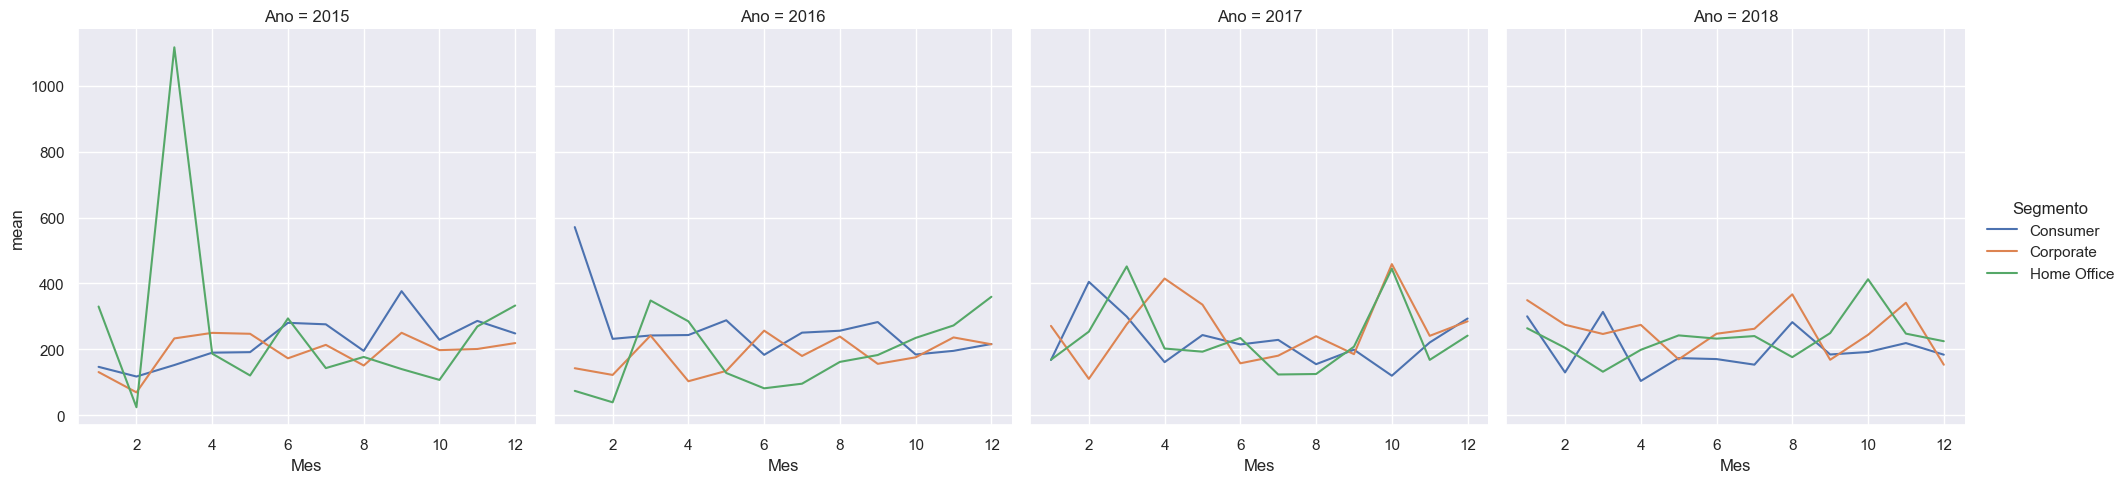

In [36]:
# Plot
plt.figure(figsize=(12, 6))
sns.set()
fig1 = sns.relplot(kind='line',
                  data=df_stat,
                  y='mean',
                  x=meses,
                  hue=segmentos,
                  col=anos,
                  col_wrap=4)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [37]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [38]:
# Agrupamos por categoria e subcategoria e calculamos a soma somente para variáveis numéricas
df_p10 = df_dsa.groupby(['Categoria', 'SubCategoria']).sum(numeric_only=True).sort_values('Valor_Venda', ascending=False).head(12)

# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
df_p10 = df_p10[['Valor_Venda']].astype(int).sort_values(by='Categoria').reset_index()

# DataFrame com categorias e subcategorias
df_p10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [39]:
# Criamos outro DataFrame somente com os totais por categoria
df_p10_cat = df_p10.groupby('Categoria').sum(numeric_only=True).reset_index()
df_p10_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [40]:
# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

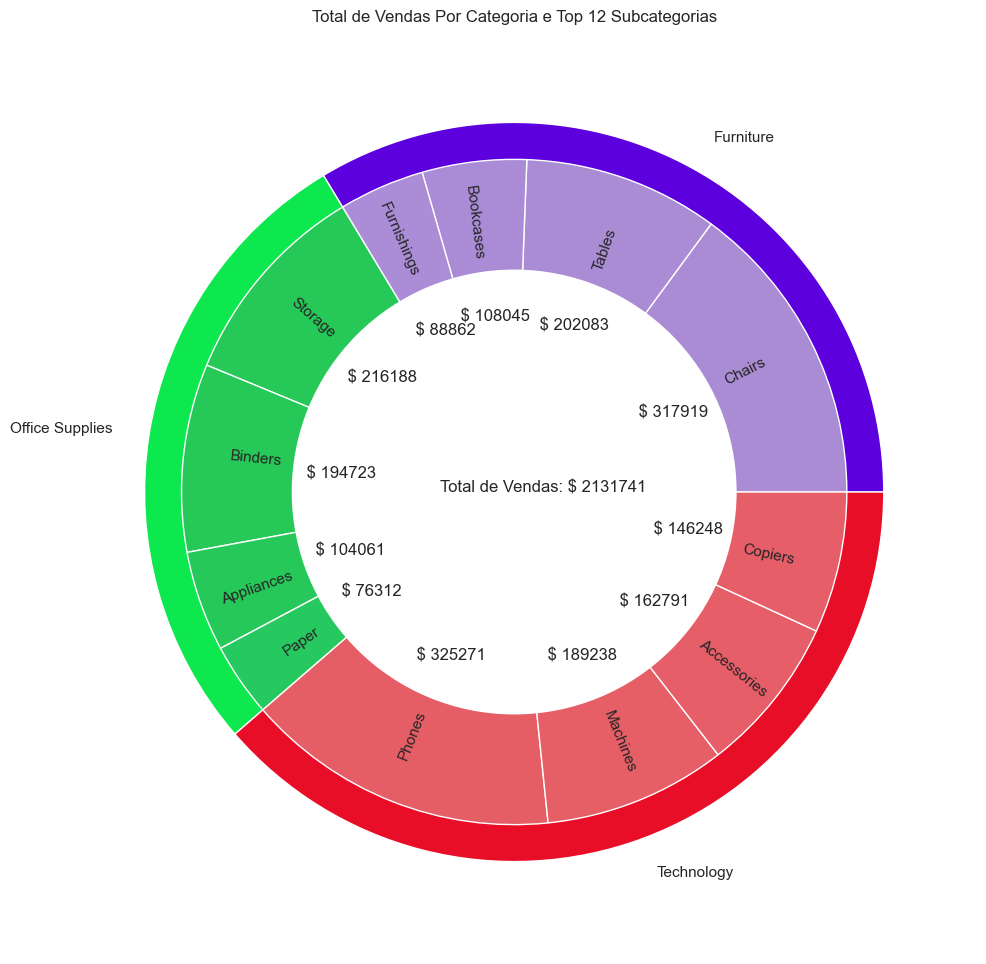

In [41]:
# Plot

# Tamanho da Figura
fig, ax = plt.subplots(figsize=(18, 12))

# Gráfico das Categorias
p1 = ax.pie(df_p10_cat['Valor_Venda'],
            radius=1,
            labels=df_p10_cat['Categoria'],
            wedgeprops=dict(edgecolor='white'),
            colors=cores_categorias)

# Gráfico das Subcategorias
p2 = ax.pie(df_p10['Valor_Venda'],
            radius=0.9,
            labels=df_p10['SubCategoria'],
            autopct=autopct_format(df_p10['Valor_Venda']),
            colors=cores_subcategorias,
            labeldistance=0.7,
            wedgeprops=dict(edgecolor='white'),
            pctdistance=0.53,
            rotatelabels=True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc='white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text='Total de Vendas: ' + '$ ' + str(int(sum(df_p10['Valor_Venda']))), xy=(-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 Subcategorias')
plt.show()

# Fim